# Task 1

Background:
"to better understand the types of customers who purchase Chips and their purchasing behaviour within the region".
Aim to facilitate supermarket strategy relating to chip category.

In [154]:
import pandas as pd
import datetime as dt
import typing
import matplotlib.pyplot as plt
import numpy as np
import re

In [155]:
purchase_behaviour = pd.read_csv("resources/QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("resources/QVI_transaction_data.xlsx") 

## Purchase Behaviour Cleaning

In [156]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [157]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [158]:
purchase_behaviour.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [159]:
for col in purchase_behaviour.columns:
    if purchase_behaviour[col].hasnans:
        print(col)

print("LIFESTAGE")
print(purchase_behaviour['LIFESTAGE'].unique())

print("PREMIUM_CUSTOMER")
print(purchase_behaviour['PREMIUM_CUSTOMER'].unique())

LIFESTAGE
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER
['Premium' 'Mainstream' 'Budget']


Purchase behaviour data is clean, there are 72637 unique loyalty card numbers and entries. Each entry represents a registered loyalty card where the owner is at a certain life stage and premium customer level. 

## Transaction Data Cleaning

In [160]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [161]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [162]:
transaction_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [163]:
for col in transaction_data.columns:
    if transaction_data[col].hasnans:
        print(col)

Observations:
- DATE is not in date format. Given it comes from an excel sheet, it is days passed from a certain date.
- PROD_NAME seems to be in the form Company-Type/Flavour-Packet Size. Which means the data is not as flexible/robust as it potentially could be.
- Outliers could exist in the several numerical quantities provided
- No null values 

In [164]:
# Let td_clean represent the transaction data as it is cleaned and manipulated.
td_clean = transaction_data

### Cleaning Dates

Change the dates and verify

In [165]:
def integer_date_to_datetime(d):
    """
    https://stackoverflow.com/questions/75203103/excel-number-to-convert-to-date
    Excel and csv integer dates are days from 1899/12/30. 
    """
    return dt.datetime(1899,12,30) + dt.timedelta(days=d)

td_clean['DATE'] = td_clean['DATE'].apply(integer_date_to_datetime)
td_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Since the data is supposed to be over the course of a year, lets check if there are any missing dates. 

In [166]:
len(td_clean.DATE.unique())

364

In [167]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

all_dates = pd.DataFrame({'DATE': date_range})

transactions_complete = all_dates.merge(td_clean, on='DATE', how='left').fillna(0)

In [168]:
transactions_per_day

,DATE,Transaction_Count
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
360,2019-06-26,723
361,2019-06-27,709
362,2019-06-28,730
363,2019-06-29,745


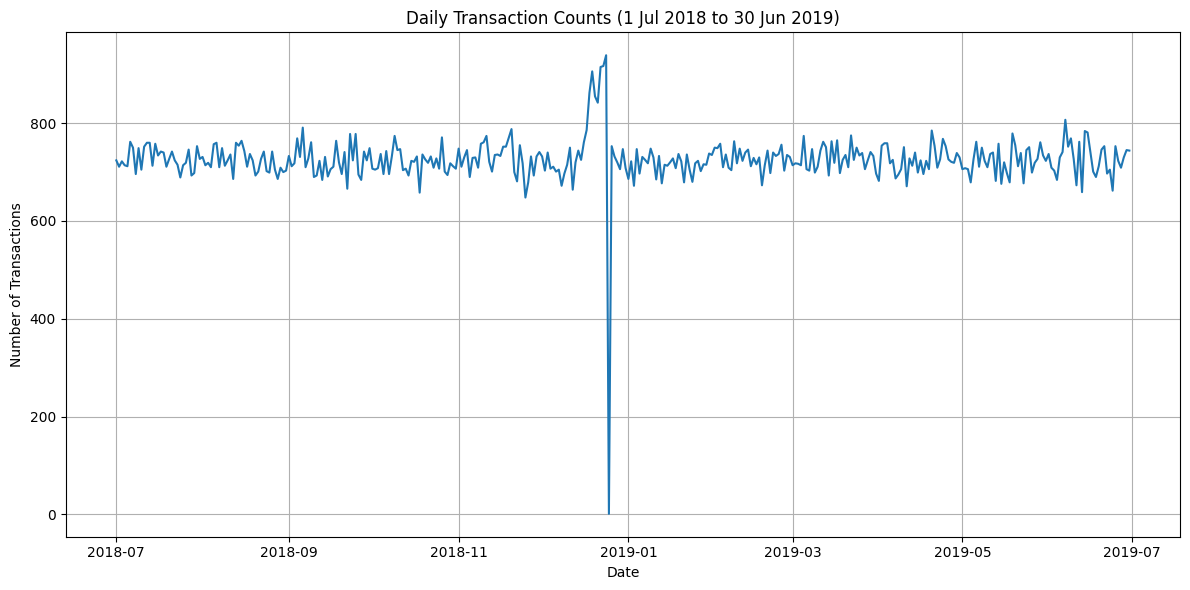

In [169]:
# Count the number of transactions per day
transactions_per_day = transactions_complete.groupby('DATE').size().reset_index(name='Transaction_Count')

plt.figure(figsize=(12, 6))
plt.plot(transactions_per_day['DATE'], transactions_per_day['Transaction_Count'], linestyle='-', marker=None)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Counts (1 Jul 2018 to 30 Jun 2019)')
# plt.xticks()
plt.grid(True)
# monthly_ticks = pd.date_range(start=transactions_per_day['DATE'].min(), 
#                               end=transactions_per_day['DATE'].max(), freq='MS')
# plt.xticks(ticks=monthly_ticks, labels=monthly_ticks.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout() 
plt.show()

Appears to be a missing date in December, and constant fluctuations. 

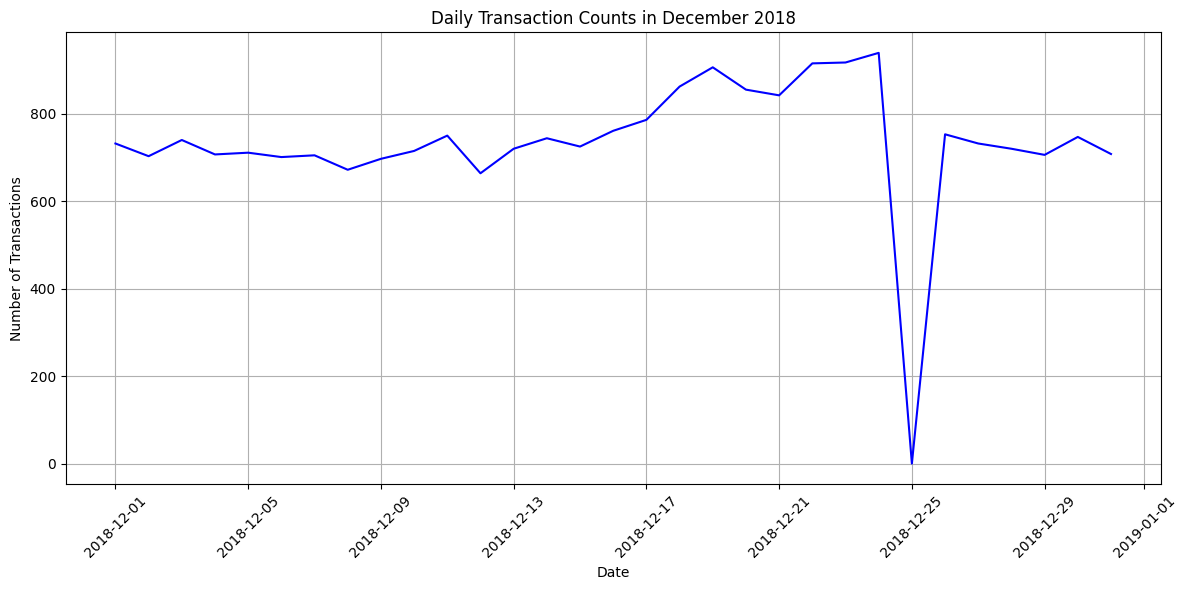

In [170]:
december_transactions = transactions_per_day[transactions_per_day['DATE'].dt.month == 12]
december_transactions = december_transactions[december_transactions['DATE'].dt.year == 2018]
plt.figure(figsize=(12, 6))
plt.plot(december_transactions['DATE'], december_transactions['Transaction_Count'], linestyle='-', marker=None, color='b')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Counts in December 2018')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

It appears that the missing date comes from Christmas Day, the stores closing on that day. Just before Christmas day also appears to be the peak as well. 

### Checking for Outliers

We'll now check for outliers in the following variables:
- PROD_QTY
- TOT_SALES

We shouldn't need to worry about the ID types.

Outlier identification method depends on how we expect these variables to be distributed respectively.
Lets treat them as potentially skewed distributions. The reason being that since transactions span over a long time period, and are dependent on other factors, it's not likely to follow a nice distribution like a normal distribution. The boxplot method will be used. 

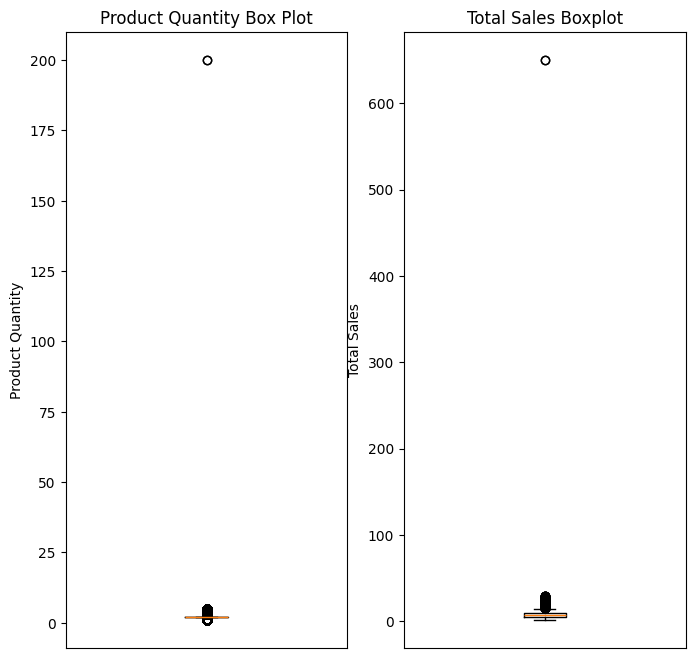

In [171]:
fig, axis = plt.subplots(1, 2)

# Needs to be bigger or the x labels are covered by titles.
fig.set_size_inches(8, 8)

ax1 = axis[0]
ax2 = axis[1]

ax1.boxplot(td_clean['PROD_QTY'])
ax1.set_title("Product Quantity Box Plot")
ax1.set_ylabel("Product Quantity")
ax1.axes.get_xaxis().set_visible(False)

ax2.boxplot(td_clean['TOT_SALES'])
ax2.set_title("Total Sales Boxplot")
ax2.set_ylabel("Total Sales")
ax2.axes.get_xaxis().set_visible(False)

In [172]:
def calc_outlier_bounds(column_name):
    column = td_clean[column_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1 - 1.5 * IQR
    upperbound = q1 + 1.5 * IQR

    print(f"======= {column_name} =======")
    print(f"Q1: {q1}\nQ3: {q3}\nIQR: {IQR}\n\nLowerbound (anything below considered outliers): {lowerbound}\nUpperbound (anything above considered outliers): {upperbound}\n")

calc_outlier_bounds('PROD_QTY')
calc_outlier_bounds('TOT_SALES')

======= PROD_QTY =======
Q1: 2.0
Q3: 2.0
IQR: 0.0

Lowerbound (anything below considered outliers): 2.0
Upperbound (anything above considered outliers): 2.0

======= TOT_SALES =======
Q1: 5.4
Q3: 9.2
IQR: 3.799999999999999

Lowerbound (anything below considered outliers): -0.29999999999999805
Upperbound (anything above considered outliers): 11.099999999999998



Using common sense, we will not act upon these outlier bounds, however it is interesting to see. It seems that we really only have one outlier, which is a product quantity of around 200 and a total sales of around 650. It appears as if a bulk order got mixed in. 

In [173]:
td_clean[(td_clean['PROD_QTY'] == td_clean['PROD_QTY'].max()) | (td_clean['TOT_SALES'] == td_clean['TOT_SALES'].max())]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We should check to make sure they're not mistakenly in the customer table as well, and check any other transactions they made. 

In [174]:
purchase_behaviour[purchase_behaviour['LYLTY_CARD_NBR'] == 2260000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [175]:
td_clean = td_clean.drop(td_clean[td_clean['PROD_QTY'] == td_clean['PROD_QTY'].max()].index)

In [176]:
td_clean[td_clean['LYLTY_CARD_NBR'] == 2260000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


We should also check that logically, no transactions should have been made if the product quantity was 0 or less, or the total sales of that transaction was 0 or less.

In [177]:
td_clean[td_clean['PROD_QTY'] <= 0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [178]:
td_clean[td_clean['TOT_SALES'] <= 0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


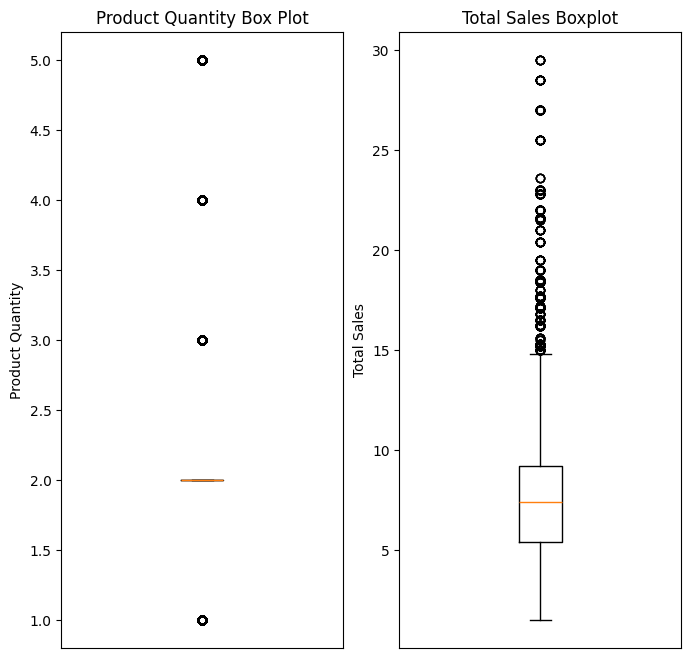

In [179]:
fig, axis = plt.subplots(1, 2)

# Needs to be bigger or the x labels are covered by titles.
fig.set_size_inches(8, 8)

ax1 = axis[0]
ax2 = axis[1]

ax1.boxplot(td_clean['PROD_QTY'])
ax1.set_title("Product Quantity Box Plot")
ax1.set_ylabel("Product Quantity")
ax1.axes.get_xaxis().set_visible(False)

ax2.boxplot(td_clean['TOT_SALES'])
ax2.set_title("Total Sales Boxplot")
ax2.set_ylabel("Total Sales")
ax2.axes.get_xaxis().set_visible(False)

Taking another look at the boxplots, from the large amount of transaction data, it appears that a certain buying behaviour is so frequent, that other buying behaviours seem like outliers, although they are completely reasonable. 

### Splitting PROD_NAME for Robustness

Extract the Brand, Type/Flavour and Pack size from PROD_NAME.

In [180]:
def get_pack_size_from_prod_name(prod_name):
    # Example:
    # Natural Chip Compny SeaSalt175g 
    # Not guaranteed last word, take integer.
    return int("".join(filter(str.isdigit, prod_name)))

def get_string_until_integer(s):
    output = ""
    for c in s:
        if str.isdigit(c):
            break
        output += c
    return output

def get_brand_from_prod_name(prod_name: str):
    # Treat the first word as the brand name.
    return get_string_until_integer(prod_name).split(" ")[0]

def get_prod_type_from_prod_name(prod_name: str):
    split = get_string_until_integer(prod_name).strip().split(" ")
    return " ".join(split[1:])

td_clean['PACK_SIZE'] = td_clean['PROD_NAME'].apply(get_pack_size_from_prod_name)
td_clean['BRAND'] = td_clean['PROD_NAME'].apply(get_brand_from_prod_name)
td_clean['TYPE'] = td_clean['PROD_NAME'].apply(get_prod_type_from_prod_name)


td_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili


In [181]:
print(td_clean['PACK_SIZE'].describe())

count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64


PACK_SIZE doesn't need float precision, so we can change that to int64.

In [182]:
td_clean['PACK_SIZE'] = td_clean['PACK_SIZE'].astype('int64')

In [183]:
print(td_clean['PACK_SIZE'].unique())

[175 170 150 300 330 210 270 220 125 110 134 380 180 165 135 250 200 160
 190  90  70]


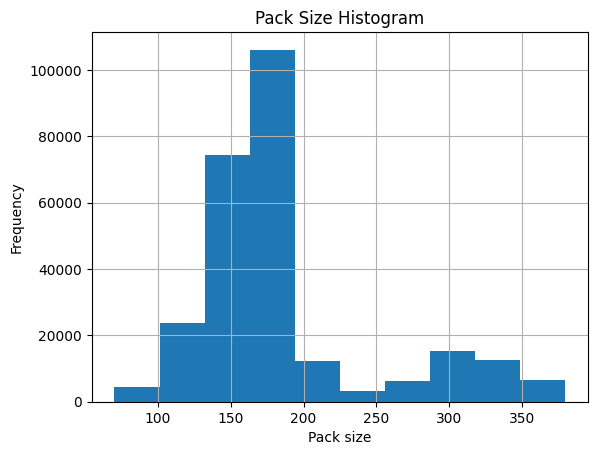

In [184]:
td_clean['PACK_SIZE'].hist()
plt.title("Pack Size Histogram")
plt.xlabel('Pack size')
plt.ylabel('Frequency')
plt.show()

Pack sizes are reasonable, and each size has a large amount of related transactions. Moving onto cleaning the brand name.

In [185]:
print(td_clean['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']


There are many possible cases that a single company is referred to in multiple ways in this dataset. e.g. Infzns and Infuzions. Lets iterate through some entry pairs and look at their full product names to detemrine whether they might refer to the same brand. 

In [186]:
possible_same_brands = [('Smiths', 'Smith'), ('Doritos', 'Dorito'), ('Woolworths', 'WW'), ('NCC', 'Natural'), ('Infuzions', 'Infzns'), ('RRD', 'Red'), ('Sunbites', 'Snbts')]

for psb in possible_same_brands:
    b1, b2 = psb
    print(f"================{b1} = {b2}================")
    print(td_clean[td_clean['BRAND'] == b1]['PROD_NAME'].head(2))
    print(td_clean[td_clean['BRAND'] == b2]['PROD_NAME'].head(2))

================Smiths = Smith================
2    Smiths Crinkle Cut  Chips Chicken 170g
3    Smiths Chip Thinly  S/Cream&Onion 175g
Name: PROD_NAME, dtype: object
50     Smith Crinkle Cut   Mac N Cheese 150g
115    Smith Crinkle Cut   Mac N Cheese 150g
Name: PROD_NAME, dtype: object
================Doritos = Dorito================
8     Doritos Corn Chip Mexican Jalapeno 150g
18    Doritos Corn Chip Southern Chicken 150g
Name: PROD_NAME, dtype: object
41    Dorito Corn Chp     Supreme 380g
67    Dorito Corn Chp     Supreme 380g
Name: PROD_NAME, dtype: object
================Woolworths = WW================
74     Woolworths Mild     Salsa 300g
158    Woolworths Medium   Salsa 300g
Name: PROD_NAME, dtype: object
13    WW Crinkle Cut      Chicken 175g
94      WW Original Corn    Chips 200g
Name: PROD_NAME, dtype: object
================NCC = Natural================
17    NCC Sour Cream &    Garden Chives 175g
21    NCC Sour Cream &    Garden Chives 175g
Name: PROD_NAME, dtype: object
0

It seems pretty safe to group these brands together.

In [187]:
for psb in possible_same_brands:
    preferred_brand_name, other_brand_name = psb
    td_clean.loc[td_clean['BRAND'] == other_brand_name, 'BRAND'] = preferred_brand_name

We also found Salsa products when our focus is on chips. We need to remove those. However it might not just be salsa that snuck in, so lets do a word analysis on the product names.

In [188]:
unique_prod_names = td_clean['PROD_NAME'].unique()
product_words = pd.Series(' '.join(unique_prod_names).split()).unique()
# Get rid of words containing digits or &
filtered_words = [word for word in product_words if not re.search(r'[\d&]', word)]

print(filtered_words)

['Natural', 'Chip', 'Compny', 'CCs', 'Nacho', 'Cheese', 'Smiths', 'Crinkle', 'Cut', 'Chips', 'Chicken', 'Thinly', 'Kettle', 'Tortilla', 'Chili', 'Old', 'El', 'Paso', 'Salsa', 'Dip', 'Tomato', 'Mild', 'Salt', 'Vinegar', 'Grain', 'Waves', 'Sweet', 'Chilli', 'Doritos', 'Corn', 'Mexican', 'Jalapeno', 'Sour', 'Sensations', 'Siracha', 'Lime', 'Twisties', 'WW', 'Thins', 'Tangy', 'Original', 'Burger', 'Rings', 'NCC', 'Cream', 'Garden', 'Chives', 'Southern', 'Cheezels', 'Box', 'Infzns', 'Crn', 'Crnchers', 'Gcamole', 'Sea', 'And', 'Red', 'Rock', 'Deli', 'Thai', 'Pringles', 'Sthrn', 'FriedChicken', 'BBQ', 'SR', 'Mzzrlla', 'Originl', 'saltd', 'Sp', 'Truffle', 'Swt', 'Mexicana', 'French', 'OnionDip', 'ChipCo', 'Hony', 'Soy', 'Dorito', 'Chp', 'Supreme', 'Roast', 'Mozzarella', 'Basil', 'Pesto', 'Infuzions', 'SweetChili', 'PotatoMix', 'Camembert', 'Fig', 'Smith', 'Mac', 'N', 'Honey', 'Seasonedchicken', 'Rib', 'Prawn', 'Crackers', 'GrnWves', 'Plus', 'Btroot', 'Jam', 'Tyrrells', 'Crisps', 'Lightly', 'Sa

Aside from Salsa, there were certain words such as 'Jam' and 'Mango', however after checking, most of them are simply unique flavours of chips. 

In [189]:
len(td_clean[td_clean['PROD_NAME'].str.contains('salsa', case=False, regex=True)])

18094

There are 18094 items that contain the word salsa in their name. We should check that we aren't deleting any entries that might be salsa flavoured for example.

In [190]:
names_containing_salsa = td_clean[td_clean['PROD_NAME'].str.contains('salsa', case=False, regex=True)]['PROD_NAME'].unique()
print(names_containing_salsa)

['Old El Paso Salsa   Dip Tomato Mild 300g'
 'Red Rock Deli SR    Salsa & Mzzrlla 150g'
 'Smiths Crinkle Cut  Tomato Salsa 150g' 'Doritos Salsa       Medium 300g'
 'Old El Paso Salsa   Dip Chnky Tom Ht300g'
 'Woolworths Mild     Salsa 300g'
 'Old El Paso Salsa   Dip Tomato Med 300g'
 'Woolworths Medium   Salsa 300g' 'Doritos Salsa Mild  300g']


The 'Red Rock Deli SR    Salsa & Mzzrlla 150g', 'Smiths Crinkle Cut  Tomato Salsa 150g' are salsa flavoured chips, not salsa products. The rest can safely be deleted.

In [191]:
salsa_flavoured_chips = ['Red Rock Deli SR    Salsa & Mzzrlla 150g', 'Smiths Crinkle Cut  Tomato Salsa 150g']

In [192]:
length_before = len(td_clean)

for name in names_containing_salsa:
    if name not in salsa_flavoured_chips:
        td_clean = td_clean.drop(td_clean[td_clean['PROD_NAME'] == name].index)

length_after = len(td_clean)

print(f"Deleted {length_before - length_after} entries")

Deleted 15166 entries


In [193]:
print(td_clean['TYPE'].unique())

['Chip        Compny SeaSalt' 'Nacho Cheese' 'Crinkle Cut  Chips Chicken'
 'Chip Thinly  S/Cream&Onion' 'Tortilla ChpsHny&Jlpno Chili'
 'Crinkle Chips Salt & Vinegar' 'Waves         Sweet Chilli'
 'Corn Chip Mexican Jalapeno' 'Waves Sour    Cream&Chives'
 'Sensations   Siracha Lime' 'Cheese' 'Crinkle Cut      Chicken'
 'Chips Light&  Tangy' 'Original' 'Rings' 'Sour Cream &    Garden Chives'
 'Corn Chip Southern Chicken' 'Cheese Box' 'Crinkle      Original'
 'Crn Crnchers Tangy Gcamole' 'Sea Salt     And Vinegar'
 'Chip Thinly  Cut Original' 'Rock Deli Thai  Chilli&Lime'
 'Sthrn FriedChicken' 'Sweet&Spcy BBQ' 'Rock Deli SR    Salsa & Mzzrlla'
 'Chips         Originl saltd' 'Rock Deli Sp    Salt & Truffle'
 'Thinly       Swt Chli&S/Cream' 'Chilli' 'Mexicana'
 'Crinkle Cut  French OnionDip' 'ChipCo      Hony Soy Chckn'
 'Corn Chp     Supreme' 'Chicken' 'Thinly Cut   Roast Chicken'
 'Crinkle Cut  Tomato Salsa' 'Mozzarella   Basil & Pesto'
 'Thai SweetChili PotatoMix' 'Sensations   Camember

We seem to be left with just chips now, or some variation of them. 
There are Prawn Crackers, and types that are likely very eccentric, like Mac N Cheese, Bolognese, Pork Belly.
There are also many spelling errors, however we won't worry about that for now. 
<br> <br>
Another thing to note is that multi word brand names such as Natural Chip Company and Red Rock Deli carry over into the type names. 
We could manually remove them to keep the data cleaner, however the results are still reasonable. 

We can safely remove the PROD_NAME column now

In [194]:
td_clean = td_clean.drop('PROD_NAME', axis=1)

In [195]:
td_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE
0,2018-10-17,1,1000,1,5,2,6.0,175,NCC,Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili


### Export

Merge and check for nulls then export to data.csv file. 

In [196]:
data = td_clean.merge(purchase_behaviour, how='left', on='LYLTY_CARD_NBR')  
missing_customers = data[data['LYLTY_CARD_NBR'].isnull()]  
print(f"Number of transactions without matched customer details: {missing_customers.shape[0]}")
for col in data.columns:
    if data[col].hasnans:
        print(col)

Number of transactions without matched customer details: 0


In [197]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,NCC,Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili,MIDAGE SINGLES/COUPLES,Budget


In [198]:
data.to_csv("resources/data.csv", index=False)

## Overall Analysis

### Total Sales per Customer Segment

In [199]:
data = pd.read_csv("resources/data.csv")
lifestage_ordering = ['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'OLDER SINGLES/COUPLES', 'RETIREES', 'NEW FAMILIES', 'YOUNG FAMILIES', 'OLDER FAMILIES']

In [200]:
tot_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum'
}).reset_index()

tot_sales['LIFESTAGE'] = pd.Categorical(tot_sales['LIFESTAGE'], categories=lifestage_ordering, ordered=True)
tot_sales = tot_sales.sort_values(by='LIFESTAGE').reset_index(drop=True)

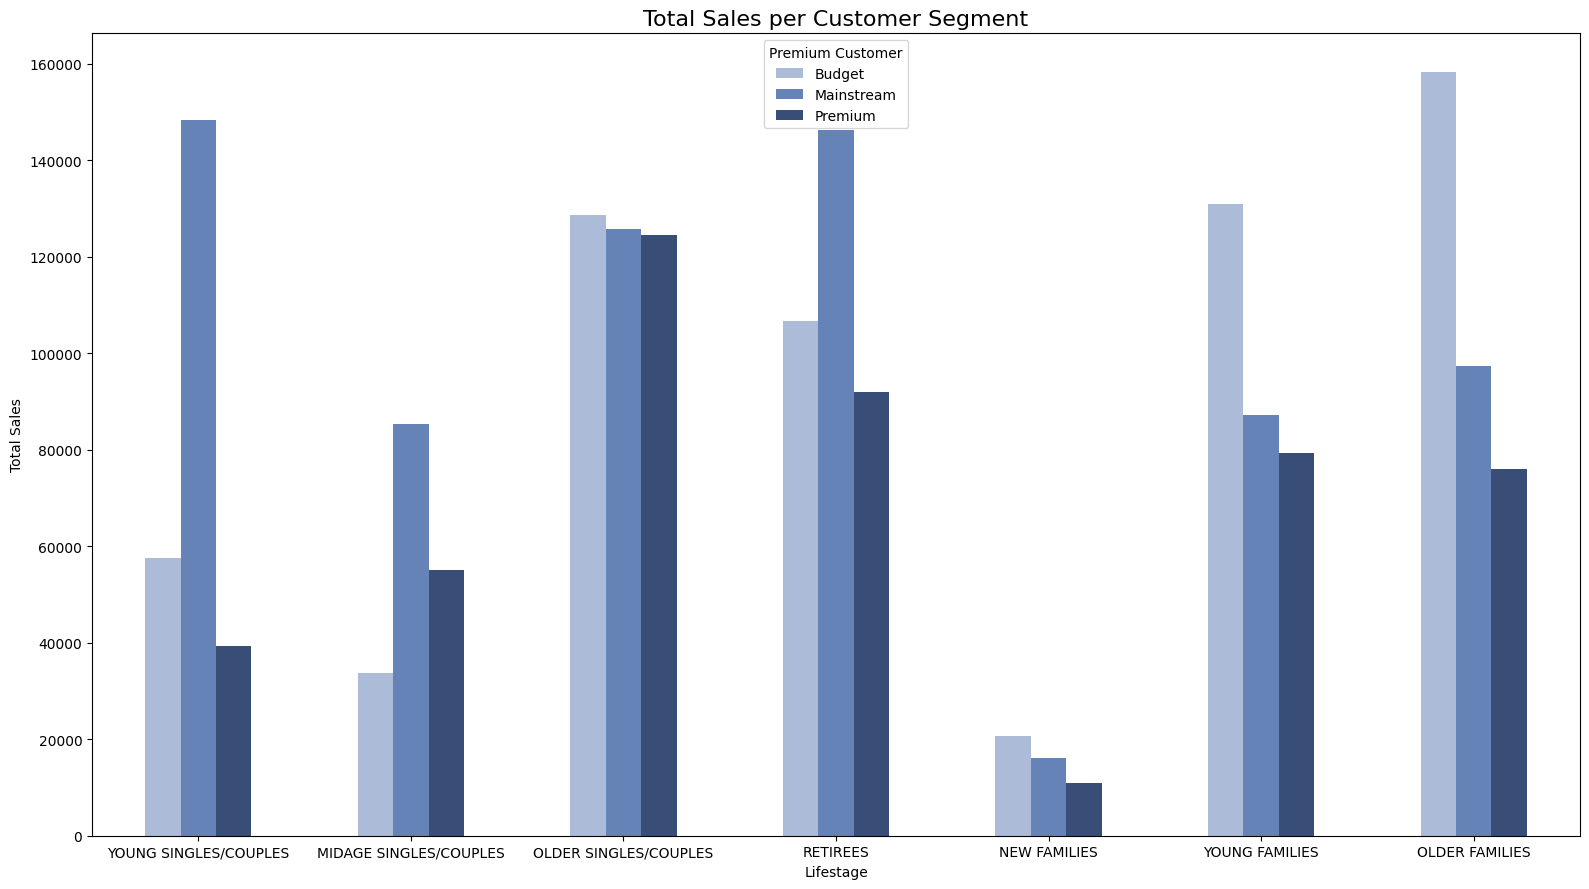

In [201]:
pivot_tot_sales = tot_sales.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="TOT_SALES")

colors = ["#ACBBD8", "#6683B7", "#384E77"]  # Dark to light gradient

pivot_tot_sales.plot(kind="bar", figsize=(16, 9), color=colors)
plt.title("Total Sales per Customer Segment", fontsize=16)
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Premium Customer", fontsize=10)
plt.tight_layout()

The highest sales per customer segment were:
1. Budget OLDER FAMILIES ($158,379.95)
2. Mainstream YOUNG SINGLES/COUPLES ($148,337.20)
3. Mainstream RETIREES ($146,328.75)

<br>
Interestingly, premium customer levels within families have the same trend of decreasing in sales as the premium customer level increases. The older the families get, the more they spend as well. 
<br> <br>
For SINGLES/COUPLES and RETIREES, Mainstream leads to the highest sales, while Budget leads to higher sales for families. 
<br> <br>
For OLDER SINGLES/COUPLES, there is little change in spend among the different premium customer levels.

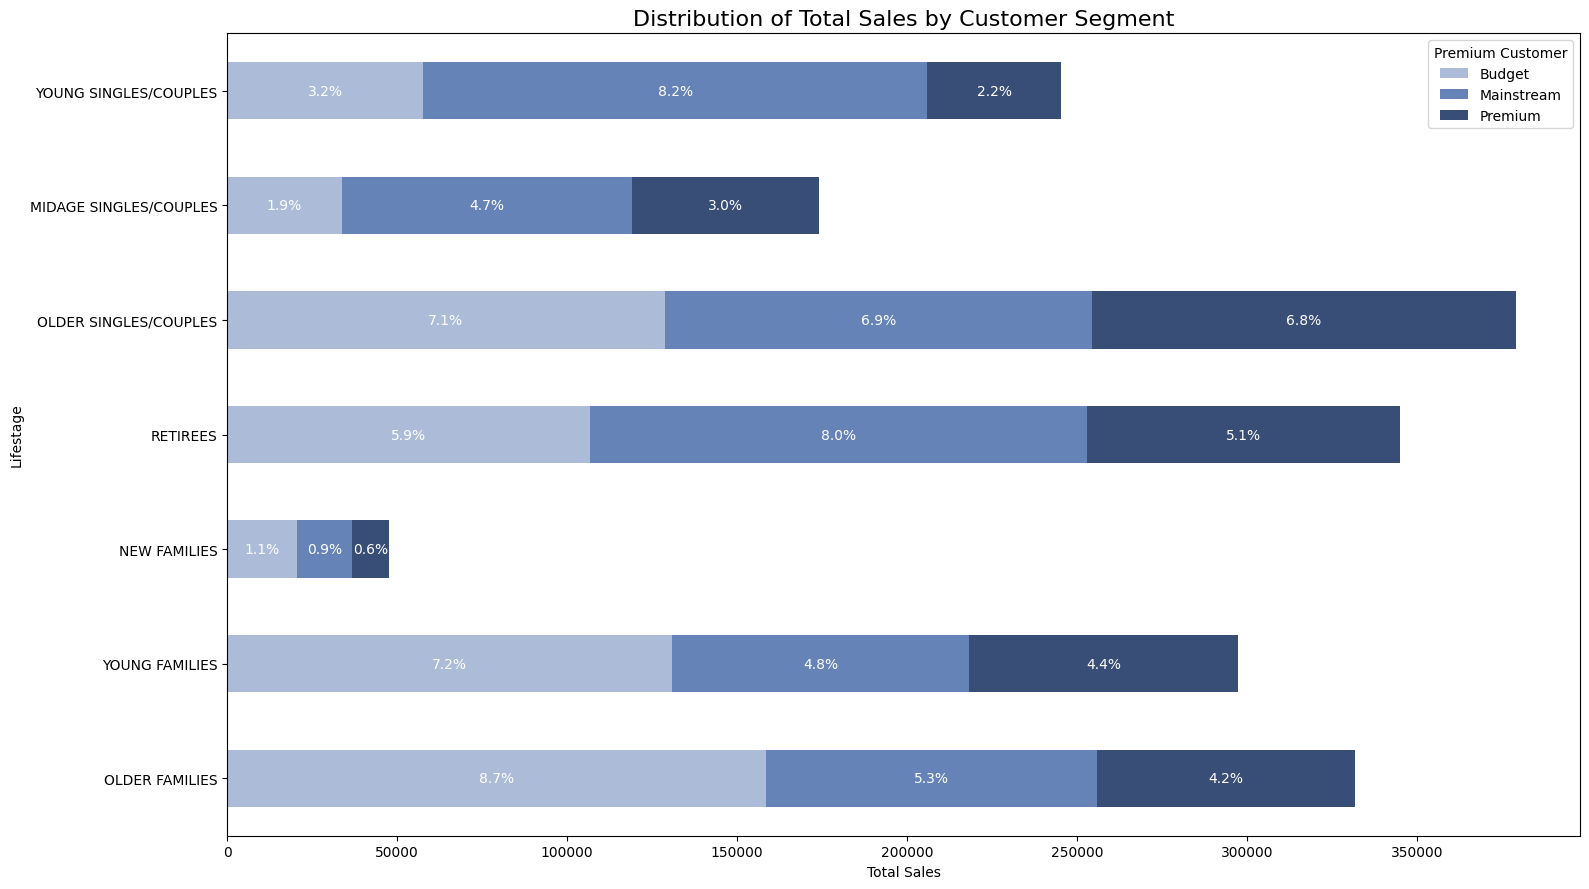

In [203]:
tot_sales['LIFESTAGE'] = pd.Categorical(tot_sales['LIFESTAGE'], categories=lifestage_ordering[::-1], ordered=True)
tot_sales = tot_sales.sort_values(by='LIFESTAGE').reset_index(drop=True)

total_sales = tot_sales['TOT_SALES'].sum()
tot_sales['Percentage_of_Total'] = tot_sales['TOT_SALES'] / total_sales * 100

pivot_tot_sales = tot_sales.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="TOT_SALES")

colors = ["#ACBBD8", "#6683B7", "#384E77"] 
pivot_tot_sales.plot(kind="barh", stacked=True, figsize=(16, 9), color=colors)

plt.title("Distribution of Total Sales by Customer Segment", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("Lifestage")
plt.legend(title="Premium Customer", fontsize=10)
plt.tight_layout()

for i, (lifestage, row) in enumerate(pivot_tot_sales.iterrows()):
    cumulative = 0 
    for premium_customer, value in row.items():
        if pd.notna(value): 
            percentage_of_total = value / total_sales * 100  
            plt.text(
                cumulative + value / 2,  
                i,  
                f"{percentage_of_total:.1f}%",  
                ha='center', va='center', color='white', fontsize=10
            )
            cumulative += value  

plt.show()

### Number of customers in each Customer Segment

In [204]:
unique_customers = data.drop_duplicates(subset=['LYLTY_CARD_NBR'])

cust_counts = unique_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='COUNT')
cust_counts['LIFESTAGE'] = pd.Categorical(cust_counts['LIFESTAGE'], categories=lifestage_ordering, ordered=True)
cust_counts = cust_counts.sort_values(by='LIFESTAGE').reset_index(drop=True)

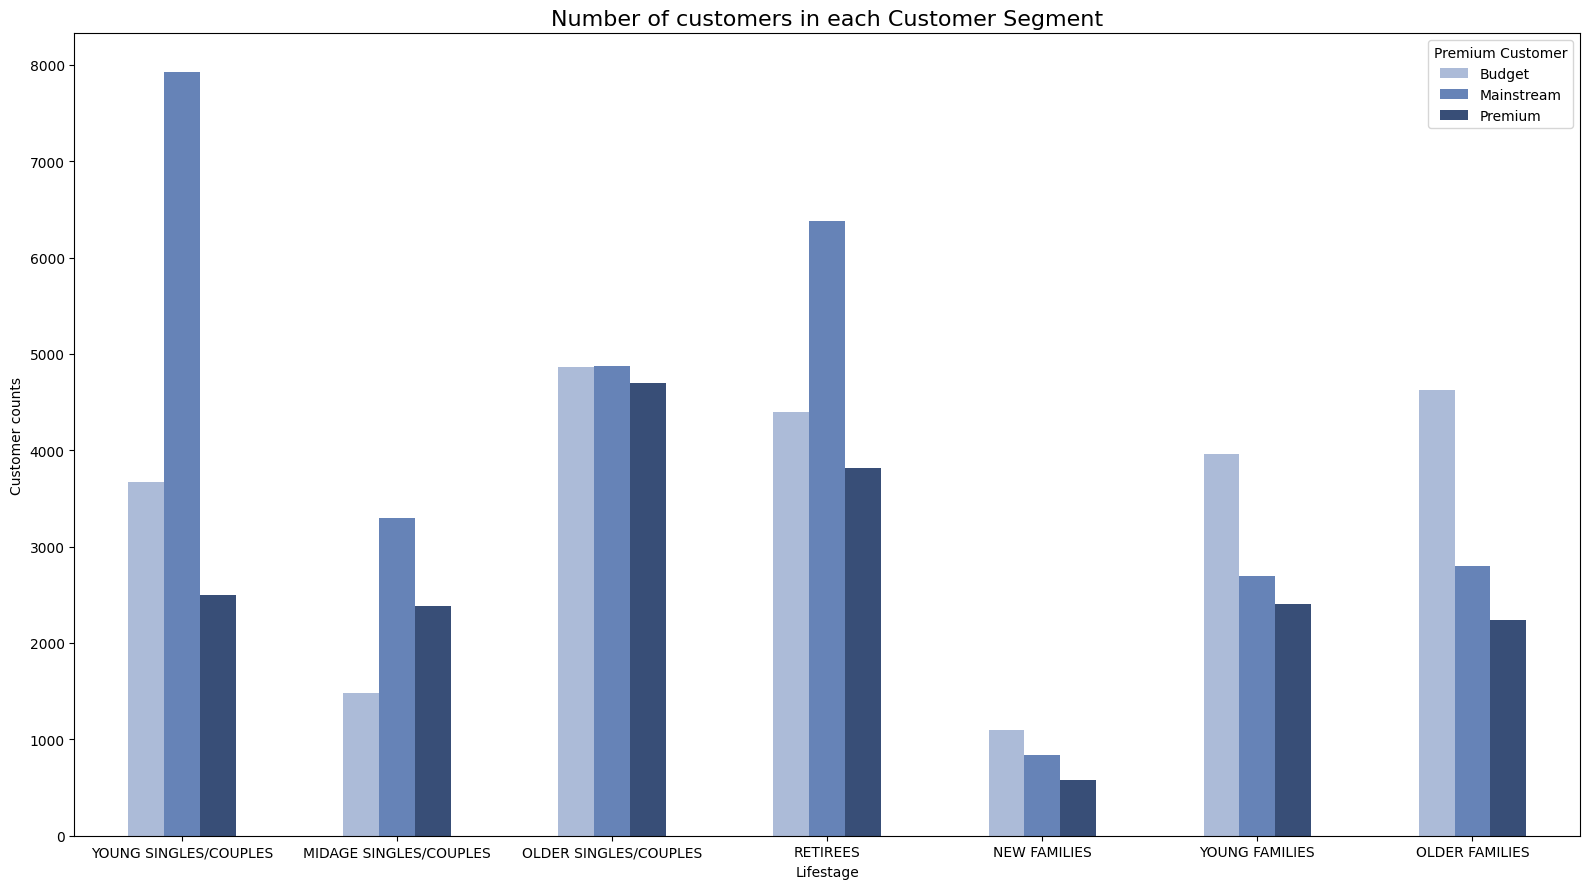

In [205]:
pivot_cust_counts = cust_counts.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="COUNT")

colors = ["#ACBBD8", "#6683B7", "#384E77"]

pivot_cust_counts.plot(kind="bar", figsize=(16, 9), color=colors)
plt.title("Number of customers in each Customer Segment", fontsize=16)
plt.xlabel("Lifestage")
plt.ylabel("Customer counts")
plt.xticks(rotation=0)
plt.legend(title="Premium Customer", fontsize=10)
plt.tight_layout()
plt.show()

The high amount of Mainstream YOUNG SINGLES/COUPLES likely is the reason for the high amount of sales related to this segment. On the other hand, the number of Budget OLDER FAMILIES is low compared to the sales they produce. 

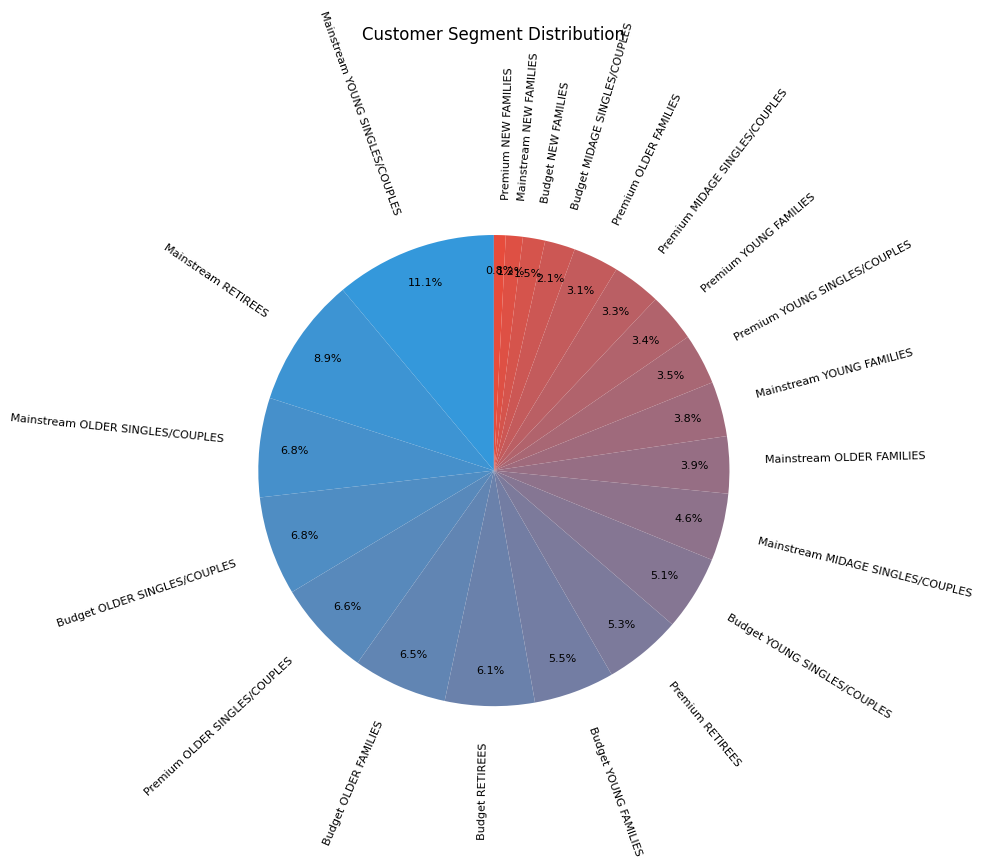

In [206]:
import matplotlib.colors as mcolors
import numpy as np

cust_counts['SEGMENT'] = cust_counts['PREMIUM_CUSTOMER'] + " " + cust_counts['LIFESTAGE'].astype(str)

cust_counts = cust_counts.sort_values(by='COUNT', ascending=False).reset_index(drop=True)

labels = cust_counts['SEGMENT']
sizes = cust_counts['COUNT']

base_color = '#3498db'
cmap = mcolors.LinearSegmentedColormap.from_list("gradient", [base_color, '#e74c3c'], N=len(sizes))

plt.figure(figsize=(10, 10))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90,  
    colors=cmap(np.linspace(0, 1, len(sizes))),  
    textprops={'fontsize': 8},  
    labeldistance=1.15,  
    pctdistance=0.85,  
    rotatelabels=True  
)
plt.title('Customer Segment Distribution', pad=80)
plt.axis('equal')  
plt.tight_layout()
plt.show()

We can also make a Pie Chart that shows us the distribution of our customers. 

### Average Units bought by Customer Segment

In [207]:
# Take the sum of product quantities bought by each customer, and then average it over the lifestage and prem cust groups.
customer_totals = (
    data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY']
    .sum()
    .reset_index()
)

# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' to calculate the average sales per customer
average_units = (
    customer_totals.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY']
    .mean()
    .reset_index(name='AVG_QTY_BOUGHT')
)

average_units['LIFESTAGE'] = pd.Categorical(average_units['LIFESTAGE'], categories=lifestage_ordering, ordered=True)
average_sales = average_units.sort_values(by='LIFESTAGE').reset_index(drop=True)

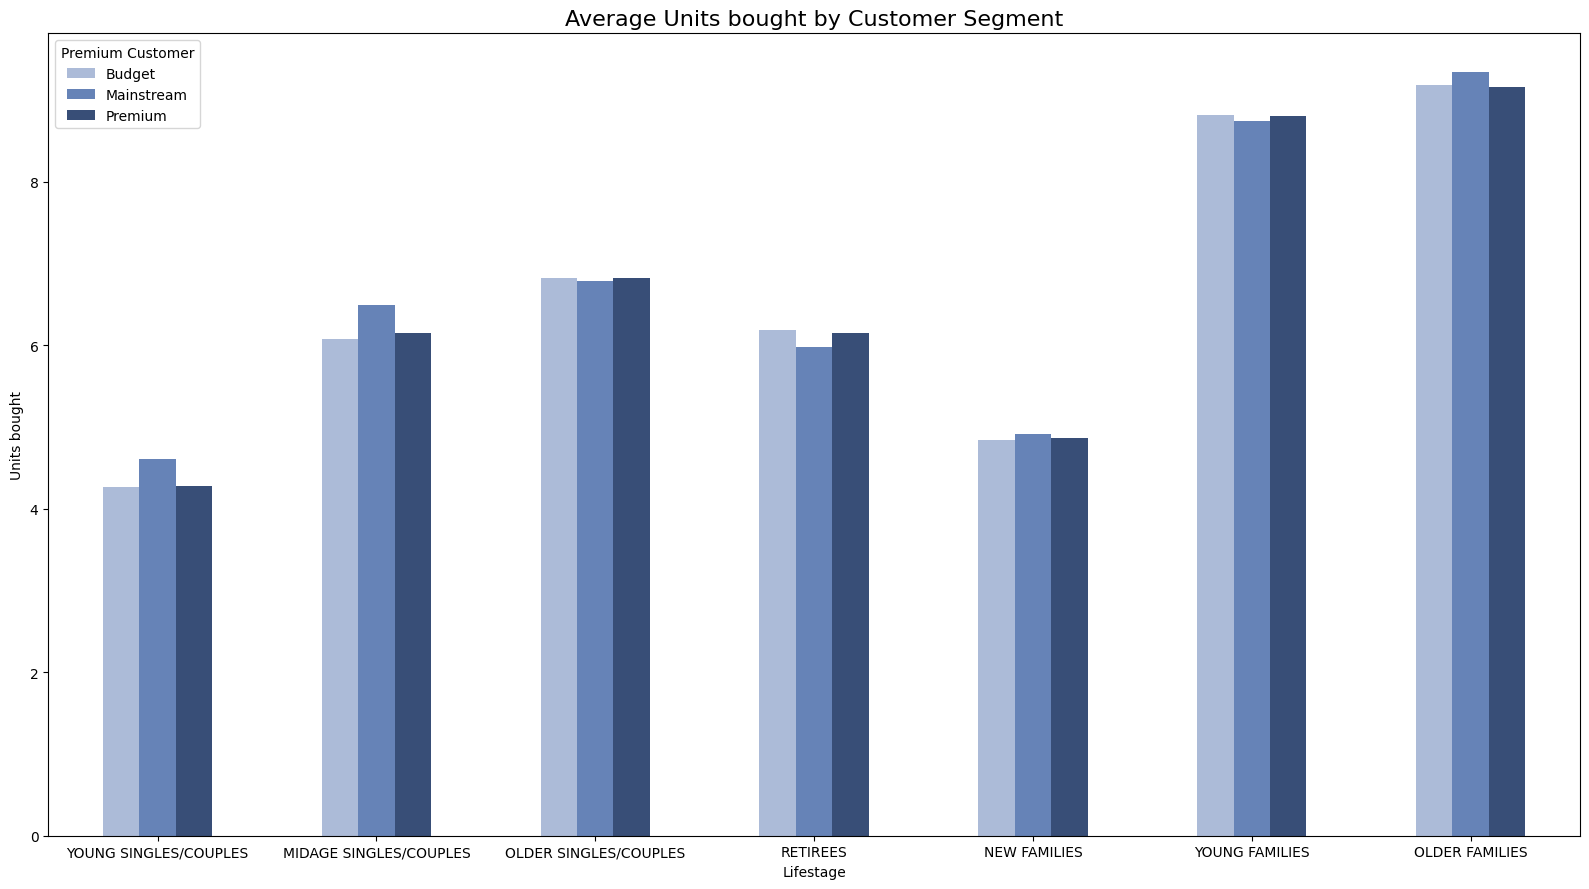

In [208]:
pivot_avg_units_per_cust_type = average_units.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="AVG_QTY_BOUGHT")

pivot_avg_units_per_cust_type.plot(kind="bar", figsize=(16, 9), color=colors)
plt.title("Average Units bought by Customer Segment", fontsize=16)
plt.xlabel("Lifestage")
plt.ylabel("Units bought")
plt.xticks(rotation=0)
plt.legend(title="Premium Customer", fontsize=10)
plt.tight_layout()
plt.show()

The highest average units bought were by OLDER FAMILIES (highest was Mainstream OLDER Families buying 9.35 packets on average).

Lifestages - NEW FAMILIES and YOUNG SINGLES/COUPLES bought the least amount of packets relative to their segment population.

Families tend to buy a higher number of packets. It also seems that as age increases, the number of packets bought typically increases.

### Average sales generated by Customer Segment

In [209]:
# Take the sum of product quantities bought by each customer, and then average it over the lifestage and prem cust groups.
customer_totals = (
    data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .reset_index()
)

# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' to calculate the average sales per customer
average_sales = (
    customer_totals.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .mean()
    .reset_index(name='AVG_SALES_GEN')
)

average_sales['LIFESTAGE'] = pd.Categorical(average_sales['LIFESTAGE'], categories=lifestage_ordering, ordered=True)
average_sales = average_sales.sort_values(by='LIFESTAGE').reset_index(drop=True)

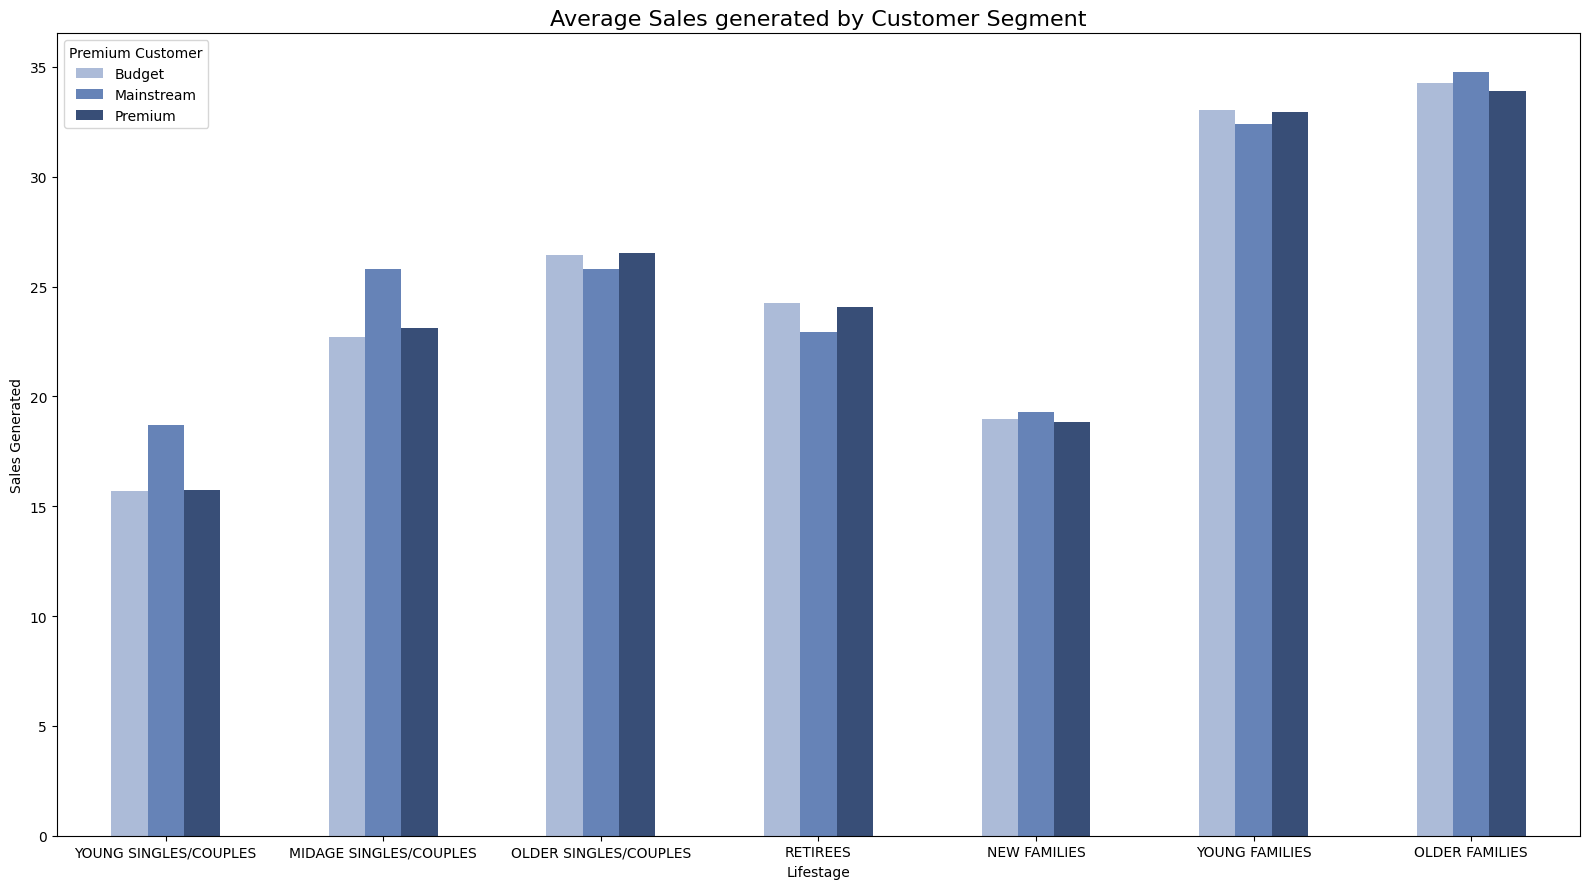

In [210]:
pivot_avg_sales_per_cust_type = average_sales.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="AVG_SALES_GEN")

pivot_avg_sales_per_cust_type.plot(kind="bar", figsize=(16, 9), color=colors)
plt.title("Average Sales generated by Customer Segment", fontsize=16)
plt.xlabel("Lifestage")
plt.ylabel("Sales Generated")
plt.xticks(rotation=0)
plt.legend(title="Premium Customer", fontsize=10)
plt.tight_layout()
plt.show()

### Average price per unit bought by Customer Segment

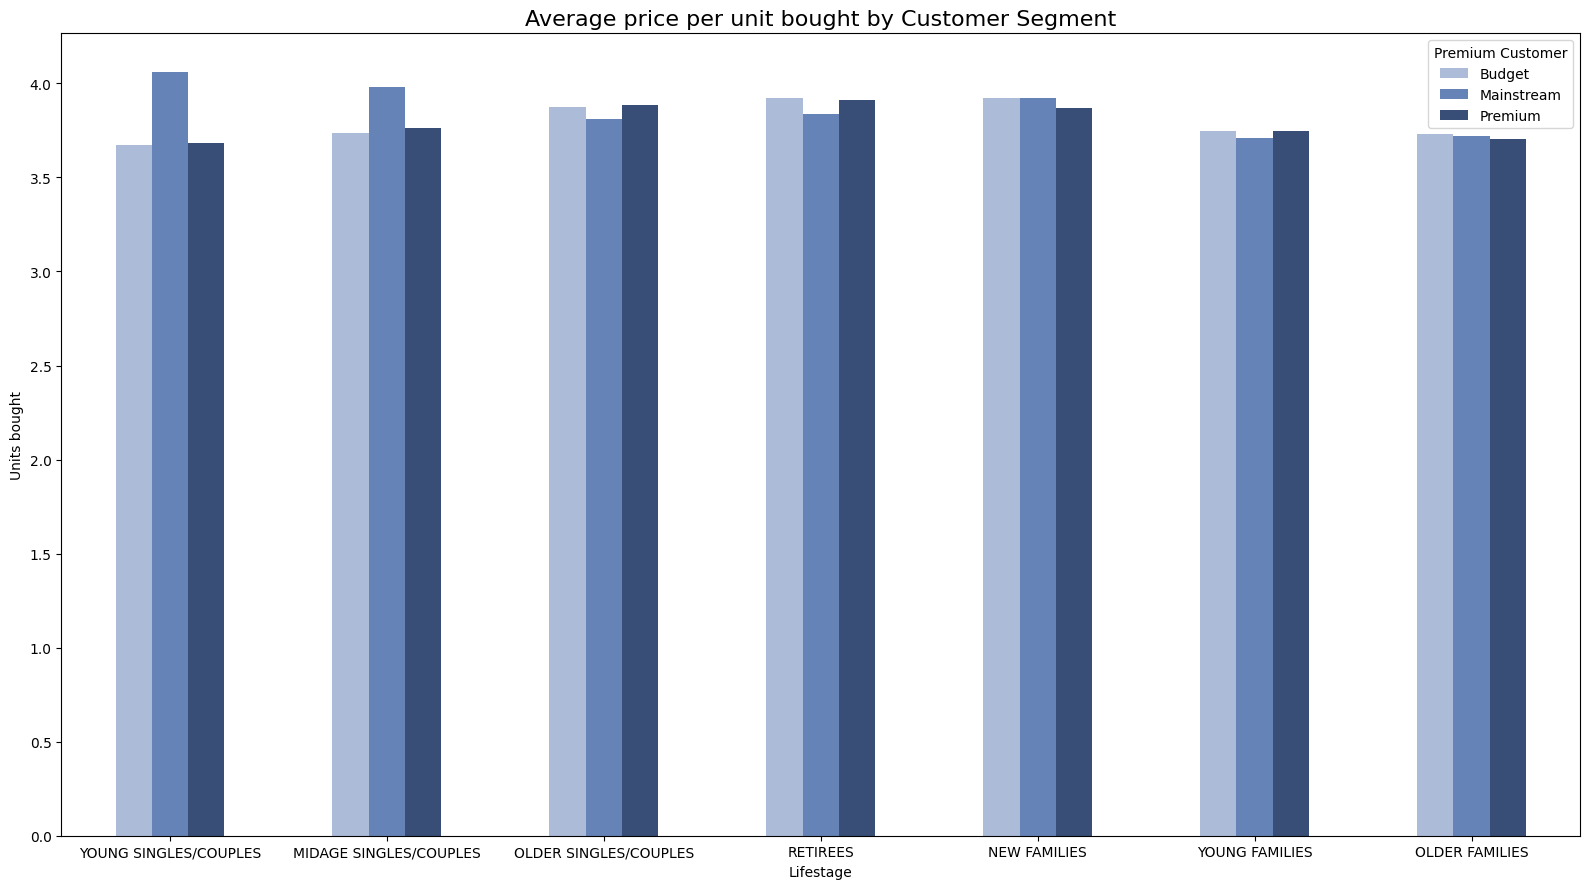

In [211]:
avg_unit_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).reset_index()
avg_unit_price['LIFESTAGE'] = pd.Categorical(avg_unit_price['LIFESTAGE'], categories=lifestage_ordering, ordered=True)
avg_unit_price = avg_unit_price.sort_values(by='LIFESTAGE').reset_index(drop=True)

avg_unit_price['AVG_PRICE_PER_UNIT'] = avg_unit_price['TOT_SALES'] / avg_unit_price['PROD_QTY']
pivot_avg_unit_price = avg_unit_price.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="AVG_PRICE_PER_UNIT")

pivot_avg_unit_price.plot(kind="bar", figsize=(16, 9), color=colors)
plt.title("Average price per unit bought by Customer Segment", fontsize=16)
plt.xlabel("Lifestage")
plt.ylabel("Units bought")
plt.xticks(rotation=0)
plt.legend(title="Premium Customer", fontsize=10)
plt.tight_layout()
plt.show()

Mainstream YOUNG SINGLES/COUPLES have the highest average price per unit ($4.06), followed by Mainstream MIDAGE SINGLES/COUPLES ($3.98). YOUNG FAMILIES and OLDER FAMILIES have the least average price, indicating they make more economical decisions. 

To determine whether the increase in the average price per unit for Mainstream YOUNG & MIDAGE SINGLES/COUPLES is significant compared to the rest of the YOUNG & MIDAGE SINGLES/COUPLES population, we can use a t-test.

T-test. <br>
Null Hypothesis: 
$$
\mu_M = \mu_{B+P}
$$

In other words, that there is no difference between the average unit price between (Mainstream Midage and Young Singles/Couples) and (Budget and Premium Midage and Young Singles/Couples).

Alternative Hypothesis: 
$$
\mu_M \neq \mu_{B+P}
$$

That there is a difference.  

In [212]:
from scipy.stats import ttest_ind

mainstream_midage_young = avg_unit_price[
    (avg_unit_price['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) &
    (avg_unit_price['PREMIUM_CUSTOMER'] == 'Mainstream')
]['AVG_PRICE_PER_UNIT']

budget_premium_midage_young = avg_unit_price[
    (avg_unit_price['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) &
    (avg_unit_price['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium']))
]['AVG_PRICE_PER_UNIT']

t_stat, p_value = ttest_ind(mainstream_midage_young, budget_premium_midage_young, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in unit price IS statistically significant.")
else:
    print("The difference in unit price IS NOT statistically significant.")


T-statistic: 6.6974, P-value: 0.0363
The difference in unit price IS statistically significant.


Hence there is strong evidence against the null hypothesis, as there is a low chance (0.036) of seeing as extreme of a difference between the average unit price from Mainstream MIDAGE & YOUNG SINGLES/COUPLES and Budget & Premium MIDAGE & YOUNG SINGLES/COUPLES.

## Mainstream YOUNG SINGLES/COUPLES Analysis

From the above analysis, we have identified Mainstream YOUNG SINGLES/COUPLES as the customer segment with the highest population, that is high sales, and has highest average price per unit. It is in our interests to examine their purchasing behaviour more closely as they are valuable customers. 

#### Brand Analysis

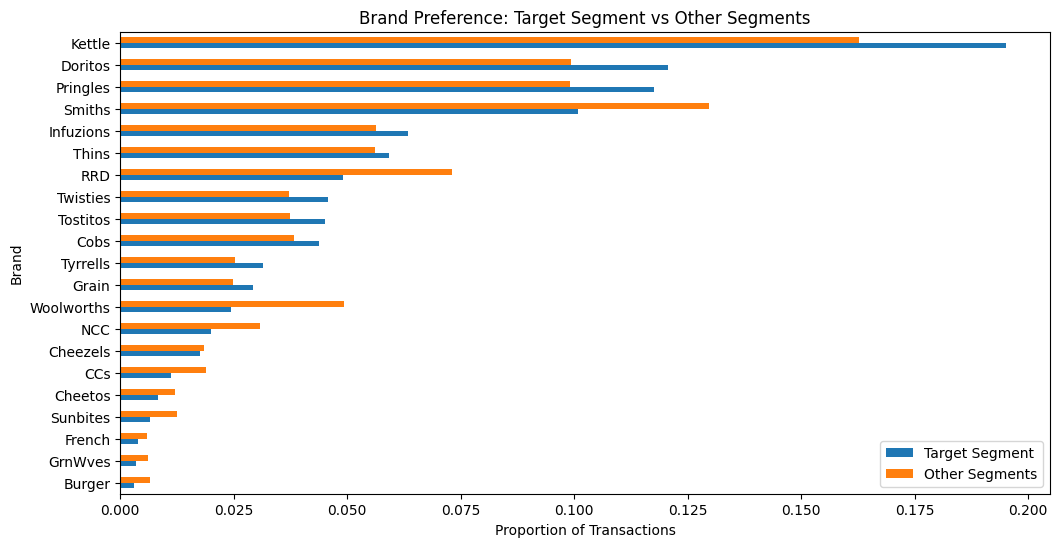

In [213]:
target_segment = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                    (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

brand_pref_target = target_segment['BRAND'].value_counts(normalize=True)

other_segments = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                      (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

brand_pref_others = other_segments['BRAND'].value_counts(normalize=True)

# Combine the results to compare
brand_comparison = pd.DataFrame({
    'Target Segment': brand_pref_target,
    'Other Segments': brand_pref_others
}).fillna(0).sort_values(by='Target Segment', ascending=True)

# Bar plot for brand preferences
brand_comparison.plot(kind='barh', figsize=(12, 6))
plt.title("Brand Preference: Target Segment vs Other Segments")
plt.ylabel("Brand")
plt.xlabel("Proportion of Transactions")
plt.show()

We can see that the target segment, Mainstream YOUNG SINGLES/COUPLES has a larger preference for the following brands:
1. Kettle
2. Doritos
3. Pringles

Which is significantly higher proportionally compared to the other segments. 
The other segments appear to prefer:
1. Kettle
2. Smiths
3. Doritos 

So while Kettle's seem to be the clear preference, the Mainstream YOUNG SINGLES/COUPLES prefer Doritos and Pringles much more compared to the other segments, and Smiths appears to be a preference for the other segments. 

We can then apply apriori analysis. Although it is typically used in transaction situations where it finds cases where if item A is purchased, item B is likely to be purchased alongside it, in this case we can use it to determine whether given the customers segment, a certain Brand is purchased.

In [214]:
from mlxtend.frequent_patterns import apriori, association_rules

brand_apriori = data.reset_index()
brand_apriori["SEGMENT"] = brand_apriori['PREMIUM_CUSTOMER'] + ' ' + brand_apriori['LIFESTAGE']

segment_brand_encode = pd.concat([pd.get_dummies(brand_apriori["SEGMENT"]), pd.get_dummies(brand_apriori["BRAND"])], axis=1)

frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1, num_itemsets=len(frequent_sets))
segments = brand_apriori["SEGMENT"].unique()
# Make antecendents Segments
rules = rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in segments)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Budget OLDER FAMILIES),(Smiths),0.087348,0.127461,0.012388,0.141829,1.112720,1.0,0.001255,1.016742,0.110997,0.061201,0.016466,0.119511
3,(Budget OLDER SINGLES/COUPLES),(Kettle),0.069472,0.165372,0.012276,0.176708,1.068551,1.0,0.000788,1.013770,0.068943,0.055158,0.013583,0.125471
4,(Budget RETIREES),(Kettle),0.057532,0.165372,0.010382,0.180451,1.091186,1.0,0.000868,1.018400,0.088667,0.048850,0.018067,0.121615
6,(Mainstream RETIREES),(Kettle),0.080915,0.165372,0.013562,0.167607,1.013518,1.0,0.000181,1.002686,0.014512,0.058275,0.002679,0.124808
8,(Mainstream YOUNG SINGLES/COUPLES),(Kettle),0.078925,0.165372,0.015396,0.195077,1.179630,1.0,0.002345,1.036905,0.165325,0.067263,0.035592,0.144090
10,(Premium OLDER SINGLES/COUPLES),(Kettle),0.067057,0.165372,0.011804,0.176024,1.064417,1.0,0.000714,1.012928,0.064869,0.053501,0.012763,0.123701


The results state that Mainstream YOUNG SINGLES/COUPLES buying Kettle's chips have the highest support, confidence and lift. 
Specifically:
- (Support = 0.015) 1.5% of all transactions are when the target segment buys Kettle's
- (Confidence 0.195) Given a transaction by the target segment, there is a 19.5% chance of Kettle's being purchased.
- (Lift = 1.180) The likelihood of Kettle's being purchased by the target segment is 1.18 times likelier than if the two were independent. 

Aside from this, another thing to note is that Budget OLDER FAMILIES also like to buy Smiths. Of those with support > 0.01, three were Budget, three were Mainstream, and one was premium. 
This might be slight evidence that Smiths and Kettle's chips are good value chips.

#### Pack Size Analysis

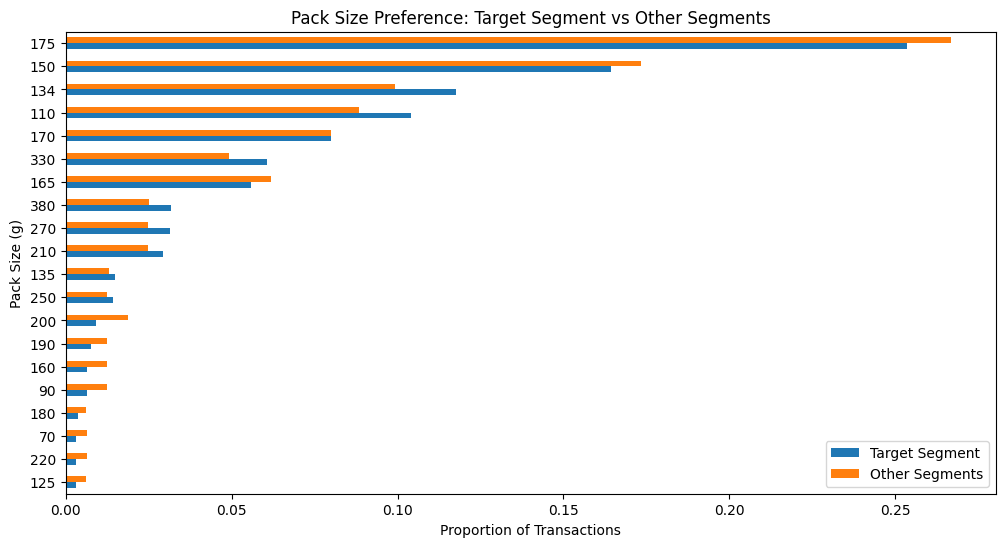

In [215]:
pack_size_target = target_segment['PACK_SIZE'].value_counts(normalize=True)
pack_size_others = other_segments['PACK_SIZE'].value_counts(normalize=True)

pack_size_comparison = pd.DataFrame({
    'Target Segment': pack_size_target,
    'Other Segments': pack_size_others
}).fillna(0).sort_values(by='Target Segment', ascending=True)

# Bar plot for pack size preferences
pack_size_comparison.plot(kind='barh', figsize=(12, 6))
plt.title("Pack Size Preference: Target Segment vs Other Segments")
plt.ylabel("Pack Size (g)")
plt.xlabel("Proportion of Transactions")
plt.show()

We can see that the both the target and other segments most prefer the following pack sizes:
1. 175g
2. 150g
3. 134g

Their preferences differ at the 330g and 165g pack sizes. The overall trend is that Mainstream YOUNG SINGLES/COUPLES prefer larger pack sizes compared to the other segments.

In [216]:
pack_size_apriori = data.reset_index()
pack_size_apriori["SEGMENT"] = pack_size_apriori['PREMIUM_CUSTOMER'] + ' ' + pack_size_apriori['LIFESTAGE']

segment_pack__encode = pd.concat([pd.get_dummies(pack_size_apriori["SEGMENT"]), pd.get_dummies(pack_size_apriori["PACK_SIZE"])], axis=1)

frequent_sets = apriori(segment_pack__encode, min_support=0.015, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1, num_itemsets=len(frequent_sets))
segments = pack_size_apriori["SEGMENT"].unique()

rules = rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in segments)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Budget OLDER FAMILIES),(150),0.087348,0.172753,0.015549,0.178008,1.030417,1.0,0.000459,1.006393,0.032344,0.063580,0.006352,0.134006
2,(Budget OLDER FAMILIES),(175),0.087348,0.265913,0.023263,0.266324,1.001546,1.0,0.000036,1.000560,0.001692,0.070494,0.000560,0.176904
5,(Budget OLDER SINGLES/COUPLES),(175),0.069472,0.265913,0.018525,0.266647,1.002761,1.0,0.000051,1.001001,0.002959,0.058463,0.001000,0.168156
6,(Budget RETIREES),(175),0.057532,0.265913,0.015408,0.267822,1.007180,1.0,0.000110,1.002608,0.007564,0.050021,0.002601,0.162884
8,(Budget YOUNG FAMILIES),(175),0.072076,0.265913,0.019710,0.273465,1.028399,1.0,0.000544,1.010394,0.029760,0.061927,0.010287,0.173794
10,(Premium OLDER SINGLES/COUPLES),(175),0.067057,0.265913,0.017856,0.266276,1.001366,1.0,0.000024,1.000495,0.001462,0.056664,0.000495,0.166713


With a support threshold of 0.015, we do not see our target segment in this table. It suggests that compared to the other segments, Mainstream YOUNG SINGLES/COUPLES do not account for as large of a proportion of transactions that relate to a specific chip packet size. Hence their preferences for pack sizes are more spread out. 

#### Type Analysis

In [217]:
print(target_segment['TYPE'].hasnans)
target_segment['TYPE'].fillna("", inplace=True)

True


C:\Users\haru\AppData\Local\Temp\ipykernel_22860\2943616538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  target_segment['TYPE'].fillna("", inplace=True)
C:\Users\haru\AppData\Local\Temp\ipykernel_22860\2943616538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_segment['TYPE'].fillna("", inplace=True)


In [218]:
def plot_type_counts(type_counts, segment):
    blacklist = ['chips', 'chip', '&'] 
    top = 10

    word_frequency = {}

    for type_name, count in type_counts.items():
        words = type_name.lower().split()
        for word in words:
            if word not in blacklist:
                if word in word_frequency:
                    word_frequency[word] += count
                else:
                    word_frequency[word] = count

    word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    top_words = word_frequency_df.head(top)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_words['Word'], top_words['Frequency'])
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(f"Top {top} words in type for {segment}")
    plt.tight_layout()
    plt.show()


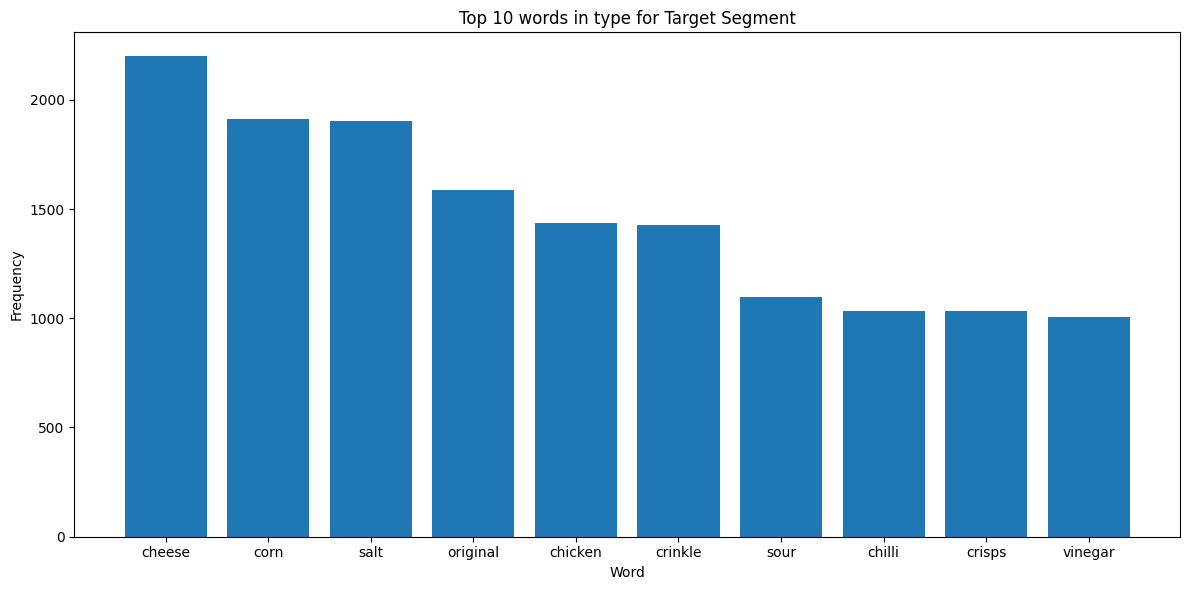

In [219]:
target_segment_type_counts = target_segment['TYPE'].value_counts()
plot_type_counts(target_segment_type_counts, "Target Segment")

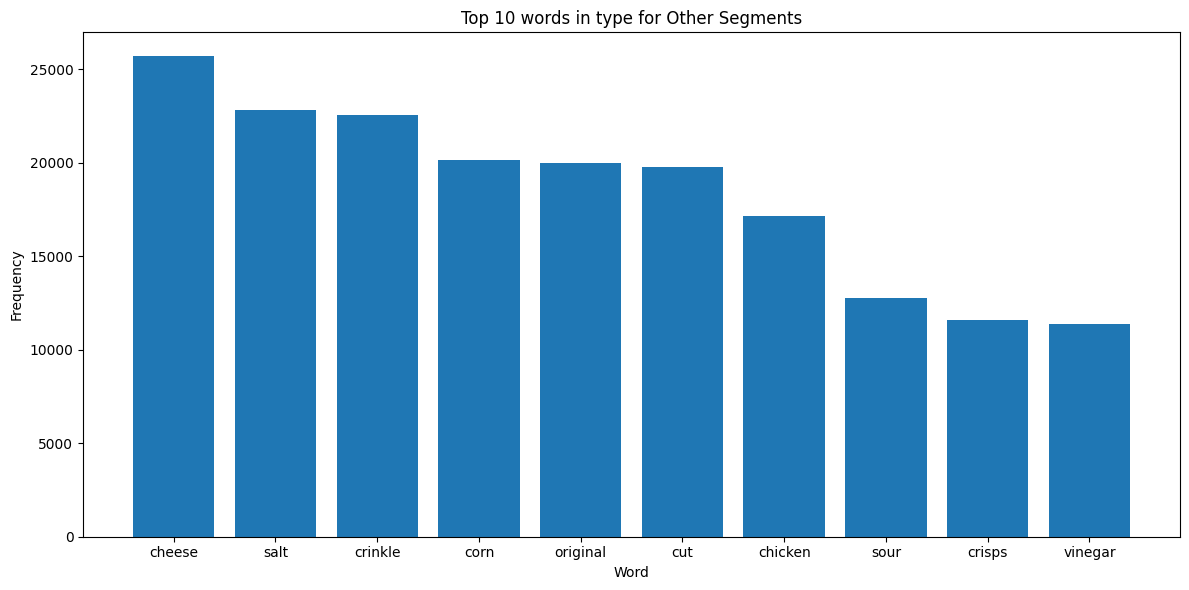

In [220]:
other_segments_type_counts = other_segments['TYPE'].value_counts()
plot_type_counts(other_segments_type_counts, "Other Segments")

We can see that the target segment, Mainstream YOUNG SINGLES/COUPLES has a larger preference for the following types:
1. Cheese
2. Corn
3. Salt

The other segments appear to prefer:
1. Cheese
2. Salt
3. Crinkle 

Both favour the 'Cheese' and 'Salt' flavour, however the target segment appears to prefer Corn chips over Crinkle chips, as opposed to the other segments.

The TYPE variable includes often includes flavour, as well as the 'cut'/'style' of the chip, and for the most part the top 10's are relatively the same, with just the ordering being different. 

# Insights

## Summary

The top 3 in total sales for each customer segment was:
1. Budget OLDER FAMILIES ($158,379.95)
2. Mainstream YOUNG SINGLES/COUPLES ($148,337.20)
3. Mainstream RETIREES ($146,328.75)

<br>
On average OLDER FAMILIES buy more units per person (Mainstream OLDER Families buy 9.35 packets on average).While NEW FAMILIES and YOUNG SINGLES/COUPLES bought the least amount of packets relative to their segment population.
<br> <br>
Mainstream YOUNG SINGLES/COUPLES have the highest average price per unit ($4.06), followed by Mainstream MIDAGE SINGLES/COUPLES ($3.98). YOUNG FAMILIES and OLDER FAMILIES have the least average price, indicating they make more economical decisions. 
<br> <br>
Mainstream YOUNG SINGLES/COUPLES were a target segment for their high population, high average price spent per unit, and high total sales. 
<br> <br>
In terms of brands, Kettle's seem to be the clear preference amongst all customers, but the Mainstream YOUNG SINGLES/COUPLES prefer Doritos and Pringles much more compared to the other segments, while Smiths appears to be a preference for the other segments. 
<br> <br>
In terms of pack size, the target segment and other segments both preferred 175g, then 150g and 134g. However the target segment prefers larger pack sizes compared to the other segments.
<br> <br>
In terms of type, Cheese and Salt flavoured chips were favoured as a whole, but the target segment preferred Corn chips over Crinkle chips, compared to the other segments.

## Recommendations

In stores, the popular brands, pack sizes and type of chips should be most easily accessible. Make Kettle's, Smiths, 175g and 150g and popular flavours closest to the ends of the aisles, and at the most easily reachable/viewable level. 
<br> <br>
Advertisement should be catered towards each customer segment. Families and older customer segments prefer value buys, while younger and midage singles and couples prefer quality and are willing to spend. 
<br> <br>
Focus on the customer groups that chips attract. The customer segments with the highest population are Midage young singles/couples and Retirees, followed by older families. 